In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
#Importing Decision Tree
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree


In [4]:
os.chdir("C:\\Users\\Particle\\OneDrive\\Desktop\\devp")


In [5]:
df = pd.read_csv("german_credit_data.csv")


In [6]:
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [7]:
df.Housing.unique()


array(['own', 'free', 'rent'], dtype=object)

In [8]:
df.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

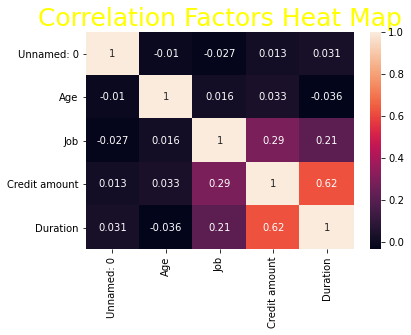

In [9]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='yellow', size='25')

In [10]:
sns.set_context('talk', font_scale=.9)

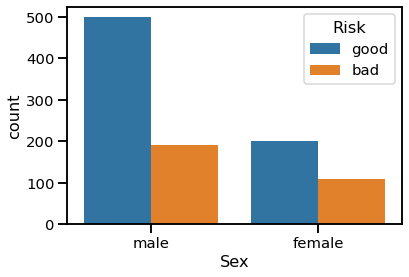

In [11]:
sns.countplot(data=df, x='Sex', hue='Risk')
plt.show()

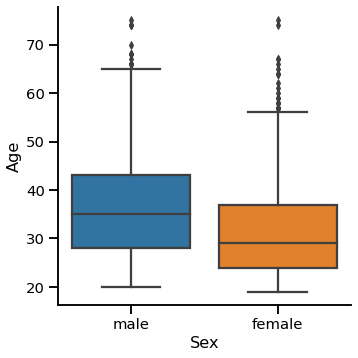

In [12]:
sns.catplot(data=df, x='Sex', y='Age', kind='box')
plt.show()

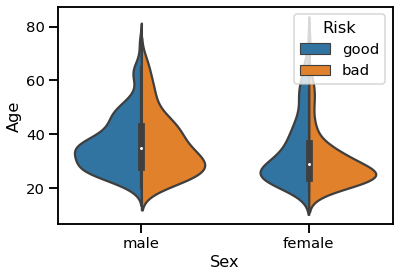

In [13]:
sns.violinplot(data=df, x='Sex', y='Age', hue='Risk', split=True)
plt.show()

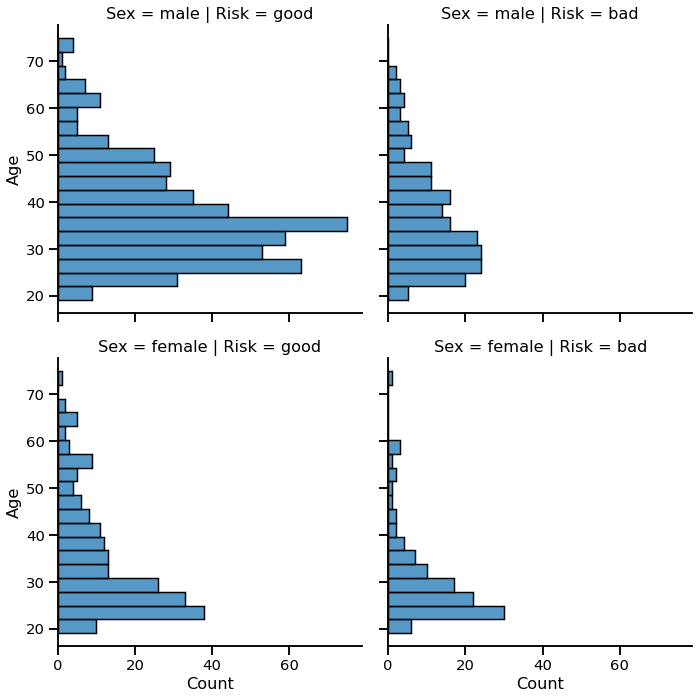

In [14]:
sns.displot(data=df, row='Sex', y='Age', col='Risk')
plt.show()

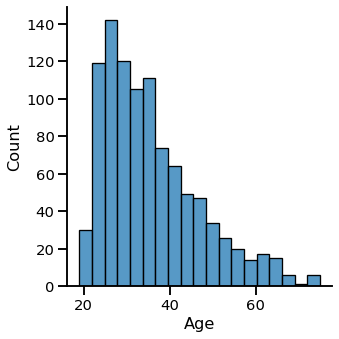

In [15]:
#Age Distribution
sns.displot(df['Age'])
plt.show()

#Splitting into categories
interval = (18, 25, 35, 60, 120)
cats = ['Young Adult', 'Adult', 'Senior', 'Elder']
df["Age_cat"] = pd.cut(df['Age'], interval, labels=cats)

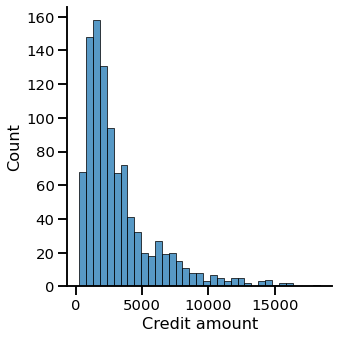

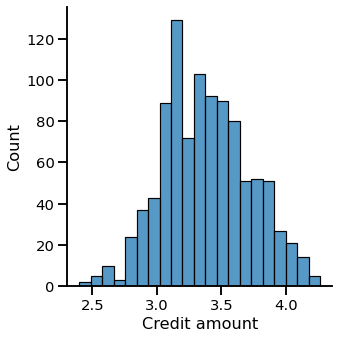

In [16]:
# credit amount distribution
sns.displot(df['Credit amount'])
plt.show()

# Alternate way to represent long tail numerical distributions 
# using e.g., a log function
sns.displot(np.log10(df['Credit amount']))
plt.show()

# Applying the new distribution to the dataset
df['Credit amount'] = np.log10(df['Credit amount'])

In [17]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')


In [18]:
def one_hot_encoder(df, column_name, exclude_col = False):
    merged_df = df.merge(pd.get_dummies(df[column_name], drop_first=False, prefix=column_name), left_index=True, right_index=True)
    if exclude_col:
        del merged_df[column_name] # Exclude the original column
    return merged_df

In [19]:
df_ready = df.copy()


category_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk'] #'Age_cat']


category_features = ['Job','Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Age_cat']

for cat in category_features:
    df_ready = one_hot_encoder(df_ready, cat, exclude_col=True)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dataset_ready_x = df_ready.drop(['Risk_bad', 'Risk_good', 'Age', 'Sex_male'], axis='columns')
X = dataset_ready_x.values
feature_names = dataset_ready_x.columns

y = df_ready['Risk_bad'].values

# Spliting X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [21]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, f1_score, precision_score, recall_score
ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
scoring_type = 'accuracy'
kfold = KFold(n_splits=5, random_state=42, shuffle=True) # Ensuring all methods are evaluated on the same fold

score = cross_val_score(ct, X_train, y_train, cv=kfold, scoring=scoring_type)
print(f'Average {scoring_type} performance of the {ct} model = {np.mean(score)}')

Average accuracy performance of the DecisionTreeClassifier() model = 0.6542857142857142


#we are getting 64% accuracy that could be increased using random forest classifier

In [22]:
ct.fit(X_train, y_train)
y_pred = ct.predict(X_test)

print(f"Accuracy of our model's prediction {np.sum((y_test == y_pred))/y_test.size}")

Accuracy of our model's prediction 0.66


In [24]:
fi = ct.feature_importances_
fi

array([0.1379736 , 0.24166926, 0.14374678, 0.00735177, 0.0259386 ,
       0.00823434, 0.02232774, 0.01029927, 0.00702871, 0.01131233,
       0.01069395, 0.02952071, 0.02468365, 0.00905325, 0.01341598,
       0.00511601, 0.01803103, 0.01002292, 0.09066094, 0.        ,
       0.02128688, 0.01993649, 0.        , 0.00868273, 0.00583645,
       0.01995908, 0.00570796, 0.        , 0.01398008, 0.0396849 ,
       0.03144961, 0.00639501])

In [25]:
list(zip(df.columns, fi))

[('Unnamed: 0', 0.13797359915455493),
 ('Age', 0.24166925823866242),
 ('Sex', 0.14374678063315355),
 ('Job', 0.007351769549389429),
 ('Housing', 0.025938601910371846),
 ('Saving accounts', 0.0082343425681404),
 ('Checking account', 0.022327736578996088),
 ('Credit amount', 0.010299268792827923),
 ('Duration', 0.007028706949765009),
 ('Purpose', 0.011312327429684438),
 ('Risk', 0.010693951387195335),
 ('Age_cat', 0.029520705201251485)]

Age , sex and job are most important features based on our output.